In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

metadata = dict(title='My first animation in 3D', artist='Matplotlib',comment='Wakanda is here now.')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)
fig = plt.figure(figsize=(10, 5))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']

with writer.saving(fig, "hilbert_1dim.mp4", dpi=200):

    def hilbert(x, y, xi, xj, yi, yj, order):
        if order == 0:
            X.append(x + (xi + yi) / 2)
            Y.append(y + (xj + yj) / 2)
            plt.clf()
            rand_color = np.random.choice(colors, size=1)
            plt.plot(X, Y, color=(matplotlib.cm.get_cmap('plasma'))(order/(2**(bits*dims))), linewidth=2)
            plt.show()
            plt.draw()
            plt.pause(0.01)
            writer.grab_frame()
        else:
            order -= 1
            hilbert(x, y, yi/2, yj/2, xi/2, xj/2, order)
            hilbert(x + xi/2, y + xj/2, xi/2, xj/2, yi/2, yj/2, order)
            hilbert(x + xi/2 + yi/2, y + xj/2 + yj/2, xi/2, xj/2, yi/2, yj/2, order)
            hilbert(x + xi/2 + yi, y + xj/2 + yj, -yi/2, -yj/2, -xi/2, -xj/2, order)

    X = []
    Y = []

    # Initial parameters
    order = 1
    size = 1

    hilbert(0, 0, 0, size, size, 0, order)
writer.finish()

Using matplotlib backend: <object object at 0x105a43660>


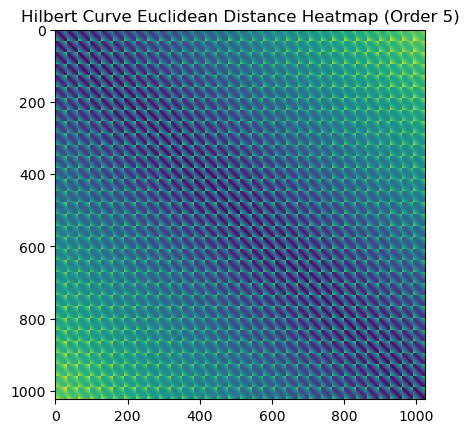

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def hilbert_curve(order):
    n = 2 ** order
    pos = np.array([[i % n, i // n] for i in range(n**2)])
    return pos

def euclidean_distance_matrix(pos):
    dist_matrix = squareform(pdist(pos, metric='euclidean'))
    return dist_matrix

order = 5
pos = hilbert_curve(order)

dist_matrix = euclidean_distance_matrix(pos)

plt.imshow(dist_matrix, cmap='viridis', interpolation='nearest')
plt.title(f'Hilbert Curve Euclidean Distance Heatmap (Order {order})')
plt.show()